In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

# Age

## ANOVA Conditions and Test

In [3]:
df = pd.read_csv('data/coffee_cleaned.csv', index_col='Submission ID')

ages_count = df.groupby(by=['age']).agg({'num_cups_daily': 'count'})
ages_count

,num_cups_daily
age,
18-24 years old,217
25-34 years old,830
35-44 years old,343
45-54 years old,73
55-64 years old,28
<18 years old,11
>65 years old,14


ANOVA p-value: 2.0403240803132175e-09


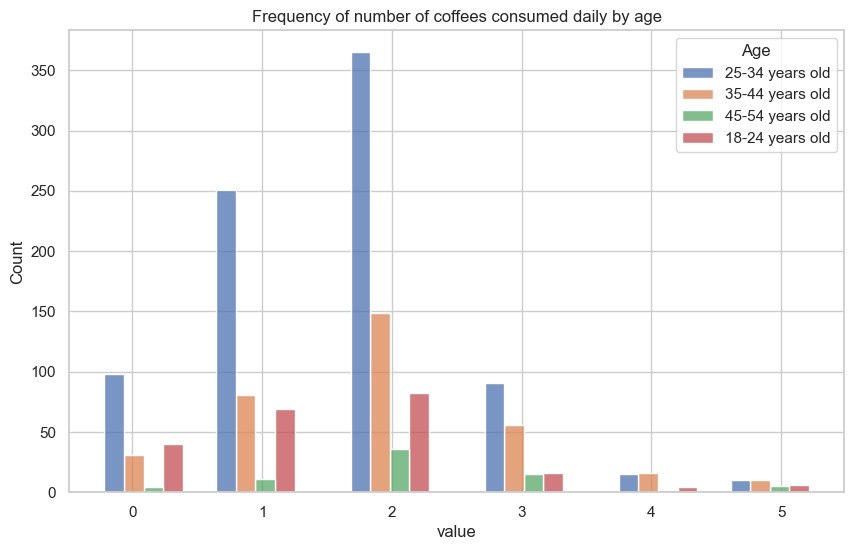

In [4]:
excluded = ['<18 years old', '55-64 years old', '>65 years old']
melted = pd.melt(df, id_vars=['age'], value_vars=['num_cups_daily'])
melted = melted.rename(columns={"age": "Age"})
melted = melted[~melted['Age'].isin(excluded)]
melted = melted.dropna(subset=['value', 'Age'])


# hist -> https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.figure(figsize=(10, 6))
plt.title('Frequency of number of coffees consumed daily by age')
sns.histplot(melted, x='value', hue='Age', multiple="dodge", shrink=3.5)

# get and print anova p-value
print('ANOVA p-value: ' + str(stats.f_oneway(melted[melted['Age'] == '18-24 years old']['value'], 
                                             melted[melted['Age'] == '25-34 years old']['value'],
                                             melted[melted['Age'] == '35-44 years old']['value'],
                                             melted[melted['Age'] == '45-54 years old']['value']).pvalue))
plt.show()

## Post HOC Analysis

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
18-24 years old 25-34 years old   0.1365 0.3039 -0.0654 0.3383  False
18-24 years old 35-44 years old   0.4202    0.0  0.1906 0.6498   True
18-24 years old 45-54 years old   0.6986    0.0  0.3404 1.0568   True
25-34 years old 35-44 years old   0.2837 0.0001  0.1138 0.4537   True
25-34 years old 45-54 years old   0.5621    0.0  0.2389 0.8853   True
35-44 years old 45-54 years old   0.2784 0.1541 -0.0629 0.6196  False
---------------------------------------------------------------------


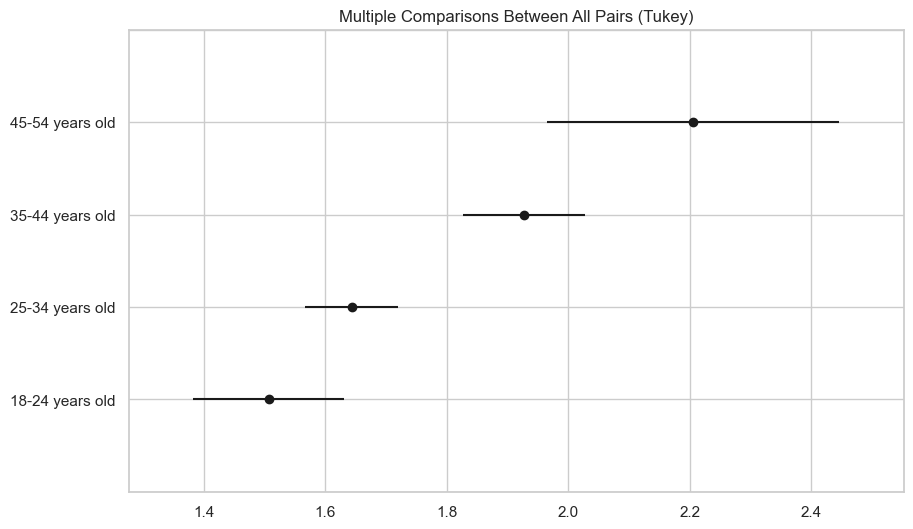

In [5]:
# run posthoc
posthoc = pairwise_tukeyhsd(melted['value'], melted['Age'], alpha=0.05)
print(posthoc)

# create figure
fig = posthoc.plot_simultaneous()

# Gender

## Mann-Whitney U Test and Conditions

In [6]:
gen_count = df.groupby(by=['Gender']).agg({'num_cups_daily': 'count'})
gen_count

,num_cups_daily
Gender,
Female,364
Male,921
Non-binary,58
Other,17


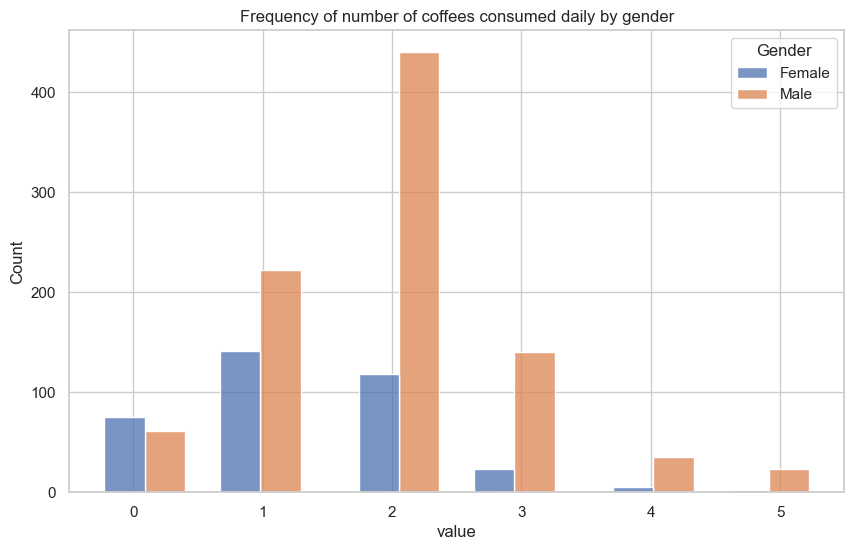

In [7]:
excluded = ['Other', 'Non-binary']
melted_gen = pd.melt(df, id_vars=['Gender'], value_vars=['num_cups_daily'])
melted_gen = melted_gen[~melted_gen['Gender'].isin(excluded)]
melted_gen = melted_gen.dropna(subset=['value', 'Gender'])


# hist -> https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.figure(figsize=(10, 6))
plt.title('Frequency of number of coffees consumed daily by gender')
sns.histplot(melted_gen, x='value', hue='Gender', multiple="dodge", shrink=3.5)
plt.show()

In [8]:
# Use mann whitney U test because samples are not normal and seem to have different variences
print('Mann-Whitney p-value: ' + str(stats.mannwhitneyu(melted_gen[melted_gen['Gender'] == 'Male']['value'],
                                                        melted_gen[melted_gen['Gender'] == 'Female']['value'],).pvalue))

Mann-Whitney p-value: 4.769640266126589e-24
